In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

//anaconda/lib/python3.5/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
resp = np.genfromtxt('XY_L1L2_natflmh_damplmh.csv', delimiter=',')

In [43]:
'''
This code takes upper and lower bounds and pulls them out out the
larger CSV so you can take the averages for a better estimate.
'''
upper_limit_x = 14
lower_limit_x = 6

upper_limit_y = 11.5
lower_limit_y = 3.5

X = resp[:,0]
Y = resp[:,1]
L1 = resp[:,2]
L2 = resp[:,3]
nl = resp[:,4]
nm = resp[:,5]
nh = resp[:,6]
dl = resp[:,7]
dm = resp[:,8]
dh = resp[:,9]

itemindex = np.where(X >= lower_limit_x)
X_below = X[itemindex]
Y_below = Y[itemindex]
L1_below = L1[itemindex]
L2_below = L2[itemindex]
nl_below = nl[itemindex]
nm_below = nm[itemindex]
nh_below = nh[itemindex]
dl_below = dl[itemindex]
dm_below = dm[itemindex]
dh_below = dh[itemindex]

itemindex2 = np.where(X_below <= upper_limit_x)
X_range = X_below[itemindex2]
Y_range = Y_below[itemindex2]
L1_range = L1[itemindex2]
L2_range = L2[itemindex2]
nl_range = nl[itemindex2]
nm_range = nm[itemindex2]
nh_range = nh[itemindex2]
dl_range = dl[itemindex2]
dm_range = dm[itemindex2]
dh_range = dh[itemindex2]

itemindex = np.where(Y_range >= lower_limit_y)
X_below2 = X_range[itemindex]
Y_below2 = Y_range[itemindex]
L1_below2 = L1_range[itemindex]
L2_below2 = L2_range[itemindex]
nl_below2 = nl_range[itemindex]
nm_below2 = nm_range[itemindex]
nh_below2 = nh_range[itemindex]
dl_below2 = dl_range[itemindex]
dm_below2 = dm_range[itemindex]
dh_below2 = dh_range[itemindex]

itemindex2 = np.where(Y_below2 <= upper_limit_y)
X_final = X_below2[itemindex2]
Y_final = Y_below2[itemindex2]
L1_final = L1_below2[itemindex2]
L2_final = L2_below2[itemindex2]
nl_final = nl_below2[itemindex2]
nm_final = nm_below2[itemindex2]
nh_final = nh_below2[itemindex2]
dl_final = dl_below2[itemindex2]
dm_final = dm_below2[itemindex2]
dh_final = dh_below2[itemindex2]

limited_resp = np.column_stack((X_final,Y_final, L1_final, L2_final, nl_final, nm_final, nh_final, dl_final, dm_final,
                               dh_final))

In [57]:
# print(np.average(limited_resp[:,4]))
# print(np.average(limited_resp[:,7]))
# print(np.average(limited_resp[:,5]))
# print(np.average(limited_resp[:,8]))
# get a min and a max also to show what robutness we need for what shaper we need to use
# Get the residul vibraiton stuff for monday then well see about the paper
np.pi

3.141592653589793

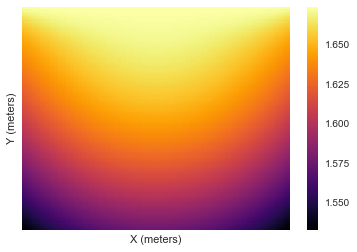

In [4]:
plt.figure(0)
hea = np.column_stack((resp[:,0],resp[:,1]
                      ,resp[:,4]))
df4 = pd.DataFrame(hea, columns=['X (meters)','Y (meters)','EL'])
Heats5 = df4.pivot("Y (meters)", "X (meters)", "EL")
sns.heatmap(Heats5, xticklabels=False, yticklabels=False, annot=False, fmt="d",
            linewidths=0, cmap="inferno")

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

class Annotate(object):
    def __init__(self):
        self.ax = plt.gca()
        self.rect = Rectangle((0,0), 1, 1)
        self.x0 = None
        self.y0 = None
        self.x1 = None
        self.y1 = None
        self.ax.add_patch(self.rect)
        self.ax.figure.canvas.mpl_connect('button_press_event', self.on_press)
        self.ax.figure.canvas.mpl_connect('button_release_event', self.on_release)

    def on_press(self, event):
        print('press')
        self.x0 = event.xdata
        self.y0 = event.ydata

    def on_release(self, event):
        print('release')
        self.x1 = event.xdata
        self.y1 = event.ydata
        self.rect.set_width(self.x1 - self.x0)
        self.rect.set_height(self.y1 - self.y0)
        self.rect.set_xy((self.x0, self.y0))
        self.ax.figure.canvas.draw()

a = Annotate()
plt.show()